In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split

In [4]:
image_width =28
image_height =28

In [5]:
class train_control_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.84:
            print('\n 훈련을 중단합니다')
            self.model.stop_training = True
callbacks = train_control_Callback()        

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_val_images, y_train_val_labels), (x_test_images, y_test_labels) = fashion_mnist.load_data()
print(x_train_val_images.ndim, y_train_val_labels.ndim, '\n')
print(x_train_val_images.shape, y_train_val_labels.shape, '\n')
print(x_test_images.shape, y_test_labels.shape, '\n')

In [ ]:
print(fashion_mnist)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>


In [ ]:
x_train_images, x_val_images, y_train_labels, y_val_labels = train_test_split(x_train_val_images, y_train_val_labels, stratify = y_train_val_labels, test_size = 0.2, random_state =25)
print(x_train_images.shape, x_val_images.shape)
print(x_train_images[0])
print(y_train_labels[0])
plt.rcParams["figure.figsize"] =(3,3)
plt.imshow(x_train_images[0])
plt.show()

In [11]:
x_train_images, x_val_images = x_train_images/255, x_val_images/255
x_train_images, x_val_images, y_train_labels, y_val_labels = train_test_split(x_train_val_images, y_train_val_labels, stratify = y_train_val_labels, test_size = 0.2, random_state =25)

print(x_train_images.shape, x_val_images.shape)

(48000, 28, 28) (12000, 28, 28)


In [12]:
x_train_images, x_val_images = x_train_images / 255, x_val_images / 255
# y_train_labels one hot encoding
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, num_classes = 10)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, num_classes = 10)
y_val_labels = tf.keras.utils.to_categorical(y_val_labels, num_classes = 10)
print(y_train_labels.shape, y_test_labels.shape, y_val_labels.shape)

(48000, 10) (10000, 10) (12000, 10)


In [ ]:
nrows = 5
ncols = 5
plt.rcParams["figure.figsize"] =(10,10)
f, axarr = plt.subplots(nrows, ncols)
for i in range(nrows*ncols):
    sub_plt = axarr[i//nrows, i%ncols]
    sub_plt.axis('off')
    sub_plt.imshow(x_train_images[i].reshape(image_width, image_height))
    sub_plt_title ='T: ' + str(np.argmax(y_train_labels[i]))
    sub_plt.set_title(sub_plt_title)
plt.show()  

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (image_width, image_height)))
model.add(Dense(10, activation ='softmax'))
model.compile(loss="categorical_crossentropy", optimizer='SGD', metrics =['accuracy'])

fit_hist = model.fit(x_train_images, y_train_labels, epochs=200, validation_data = (x_val_images, y_val_labels), callbacks = [callbacks])
print(fit_hist.history.keys())

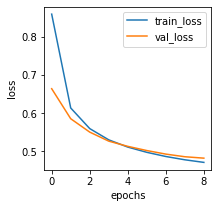

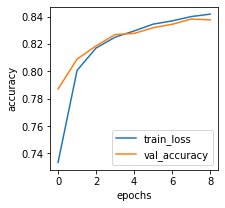

In [15]:
plt.rcParams["figure.figsize"] =(3,3)
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_loss', 'val_accuracy'])
plt.show()

In [16]:
loss, accuracy = model.evaluate(x_test_images, y_test_labels, verbose=0)
print(accuracy)

0.7912999987602234


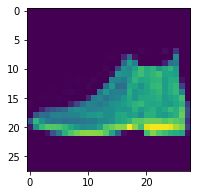

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [17]:
predict_images = model.predict(x_test_images)
plt.rcParams["figure.figsize"] =(3,3)
plt.imshow(x_test_images[0])
plt.show()
print(y_test_labels[0])
print(predict_images[0])
print(np.argmax(predict_images[0]))

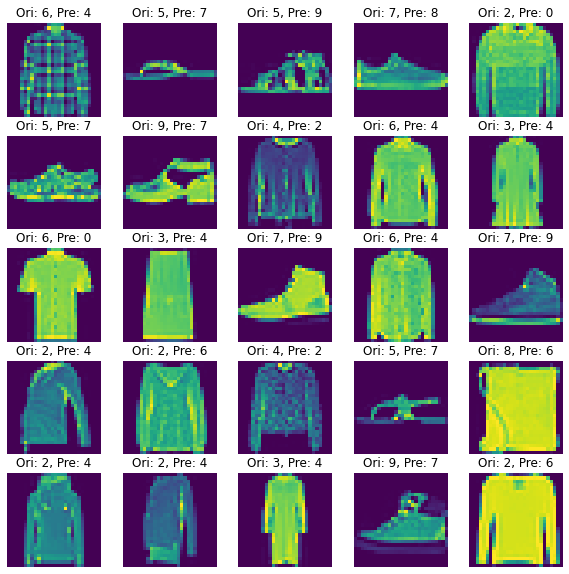

In [18]:
nrows = 5
ncols = 5
plt.rcParams["figure.figsize"] =(10,10)
f, axarr = plt.subplots(nrows, ncols)
err = 0
i = 0
while err < (nrows*ncols):
    if np.argmax(y_test_labels[i]) == np.argmax(predict_images[i]):
        i += 1
        continue
    sub_plt = axarr[err//nrows, err%ncols]
    sub_plt.axis('off')
    sub_plt.imshow(x_test_images[i].reshape(image_width, image_height))
    sub_plt_title = 'Ori: ' +str(np.argmax(y_test_labels[i])) + ', Pre: ' +str(np.argmax(predict_images[i]))
    sub_plt.set_title(sub_plt_title)
    i += 1
    err += 1
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


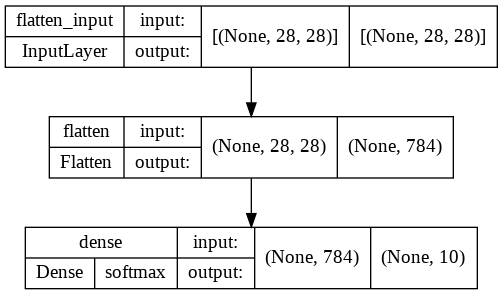

In [19]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, show_layer_names = True)